In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Ts = 501

In [3]:
acpos = []; inpos = []

for i in range(Ts):
    acpos_ = pd.read_csv('data4/ActivePos_5s133R0.8Ts'+str(i)+'.csv', names=['ac'])
    acpos.append(acpos_)
    inpos_ = pd.read_csv('data4/InactivePos_5s133R0.8Ts'+str(i)+'.csv', names=['in'])
    inpos.append(inpos_)
#==================================================================================== for R = 0.9    
acpos09 = []; inpos09 = []

for i in range(Ts):
    acpos_ = pd.read_csv('data4/ActivePos_5s133R0.9Ts'+str(i)+'.csv', names=['ac'])
    acpos09.append(acpos_)
    inpos_ = pd.read_csv('data4/InactivePos_5s133R0.9Ts'+str(i)+'.csv', names=['in'])
    inpos09.append(inpos_)

In [4]:
# collect active/inactive binding motors between beads
# prepare 12 empty buckets to put numbers between beads

ac = [[] for _ in range(12)]

for i in range(Ts):
    for j in range(12):
        acposx = acpos[i].loc[acpos[i]['ac'].between(j+1,j+2)]
        ac[j].append(acposx)

# Inactive:        
ina = [[] for _ in range(12)]

for i in range(Ts):
    for j in range(12):
        inposx = inpos[i].loc[inpos[i]['in'].between(j+1,j+2)]
        ina[j].append(inposx)
        
#======================================================================

ac09 = [[] for _ in range(12)]

for i in range(Ts):
    for j in range(12):
        acposx = acpos09[i].loc[acpos09[i]['ac'].between(j+1,j+2)]
        ac09[j].append(acposx)

# Inactive:        
ina09 = [[] for _ in range(12)]

for i in range(Ts):
    for j in range(12):
        inposx = inpos09[i].loc[inpos09[i]['in'].between(j+1,j+2)]
        ina09[j].append(inposx)

In [5]:
# get the number of active/inactive motors binding between beads
precision = 5

abm = [[] for _ in range(12)]

for i in range(Ts):
    for j in range(12):
        abmx = len(ac[j][i]) # get the number of motors binding in specific positions (between beads)
        abm[j].append(abmx)

abm_mn = [[] for _ in range(12)]
abm_std = [[] for _ in range(12)]

for k in range(12):
    # get the mean and std deviation
    abm_mn[k] = round(np.mean(abm[k]),precision) # get the mean number binding in specific positions
    abm_std[k] = round(np.std(abm[k]),precision) # get the standard deviation 
    
# Inactive: # repeat the above algorithm for the inactive motors
ibm = [[] for _ in range(12)]

for i in range(Ts):
    for j in range(12):
        ibmx = len(ina[j][i])
        ibm[j].append(ibmx)

ibm_mn = [[] for _ in range(12)]
ibm_std = [[] for _ in range(12)]

for k in range(12):
    # get the mean and std deviation
    ibm_mn[k] = round(np.mean(ibm[k]),precision)
    ibm_std[k] = round(np.std(ibm[k]),precision)
    
#=================================================================================

abm09 = [[] for _ in range(12)]

for i in range(Ts):
    for j in range(12):
        abmx = len(ac09[j][i]) # get the number of motors binding in specific positions (between beads)
        abm09[j].append(abmx)

abm_mn09 = [[] for _ in range(12)]
abm_std09 = [[] for _ in range(12)]

for k in range(12):
    # get the mean and std deviation
    abm_mn09[k] = round(np.mean(abm09[k]),precision) # get the mean number binding in specific positions
    abm_std09[k] = round(np.std(abm09[k]),precision) # get the standard deviation 
    
# Inactive: # repeat the above algorithm for the inactive motors
ibm09 = [[] for _ in range(12)]

for i in range(Ts):
    for j in range(12):
        ibmx = len(ina09[j][i])
        ibm09[j].append(ibmx)

ibm_mn09 = [[] for _ in range(12)]
ibm_std09 = [[] for _ in range(12)]

for k in range(12):
    # get the mean and std deviation
    ibm_mn09[k] = round(np.mean(ibm09[k]),precision)
    ibm_std09[k] = round(np.std(ibm09[k]),precision)

In [ ]:
f = pd.read_csv('data3/Filament_3s113R0.8Ts127.csv', names=['x','y','z'], skiprows=1)
m1 = pd.read_csv('data3/Specie1_3s113R0.8Ts127.csv', names=['x','y','z'], skiprows=1)
m2 = pd.read_csv('data3/Specie2_3s113R0.8Ts127.csv', names=['x','y','z'], skiprows=1)

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

plt.plot(f['x'],f['y'], marker='o', color='red', markerfacecolor='None', linestyle='-', linewidth=2, label='Actin')
plt.scatter(f['x'][0],f['y'][0], marker='D', color='black', label='Leading tip')
plt.scatter(m1['x'], m1['y'], marker='o', color='green', label='Active')
plt.scatter(m2['x'], m2['y'], marker='o', color='blue', label='Inactive')

ax.set_xlabel('X', fontsize=15)
ax.set_ylabel('Y', fontsize=15)
ax.legend()

#plt.savefig('fig/bm_pos3s113Ts127.svg', fmt='.svg', dpi=1200, bbox_inches='tight')
#plt.savefig('fig/bm_pos3s113Ts127.png', fmt='.png', dpi=1200, bbox_inches='tight')

plt.show()

In [49]:
len(acpos)

501

In [71]:

bins = np.arange(1,14,1)
#count=1
stt = 0

for i in range(Ts):
    fig =plt.figure(figsize=(8,8))
    ax = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)

    ax.hist(acpos[i]['ac'], bins=bins, facecolor='green', alpha=0.5, histtype='bar', ec='green', label='Active motor')
    ax.set_xticks(np.arange(1,14,1))
    ax.set_yticks(np.arange(0,13,2))
    ax.set_title('Time step: %s'%i, fontsize=15)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_bounds(1,13)
    ax.invert_xaxis()
    ax.tick_params(axis='x', which='both', pad=14)
    #if i == 0:
    ax.legend(loc = 'upper left')
    ax2.hist(inpos[i]['in'], bins=bins, facecolor='blue', alpha=0.5, histtype='bar', ec='blue', label='Inactive motor')
    ax2.set_xticks(np.arange(1,14,1))
    ax2.set_yticks(np.arange(0,13,2))
    ax2.spines['bottom'].set_position('zero')
    ax2.spines['bottom'].set_bounds(1,13)
    ax2.invert_yaxis()
    ax2.invert_xaxis()
    ax2.tick_params(axis='x', direction='in')#, length=6, width=2, colors='r',grid_color='r', grid_alpha=0.5)
    ax2.set_xticklabels([])
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    #if i == 0:
    ax2.legend(loc = 'lower left')
    #count+=1
    fig.text(1.07, 0.5, 'Actin binding position', ha='center', fontsize=15)
    fig.text(0.04, 0.5, 'Binding occurrences', va='center', rotation='vertical', fontsize=15)
    stt += 1
    plt.savefig('fig2/s5133R08_'+str(i)+'.png', fmt='.png', dpi=1200, bbox_inches='tight')
    fig.clear()
    

#fig.text(1.07, 0.5, 'Actin binding position', ha='center', fontsize=15)
#fig.text(0.04, 0.5, 'Binding occurrences', va='center', rotation='vertical', fontsize=15)

#plt.savefig('fig/motors_pos3s113Ts127.svg', fmt='.svg', dpi=1200, bbox_inches='tight')
#plt.savefig('fig/motors_pos3s113Ts127.png', fmt='.png', dpi=1200, bbox_inches='tight')

#plt.show()

/home/nitta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

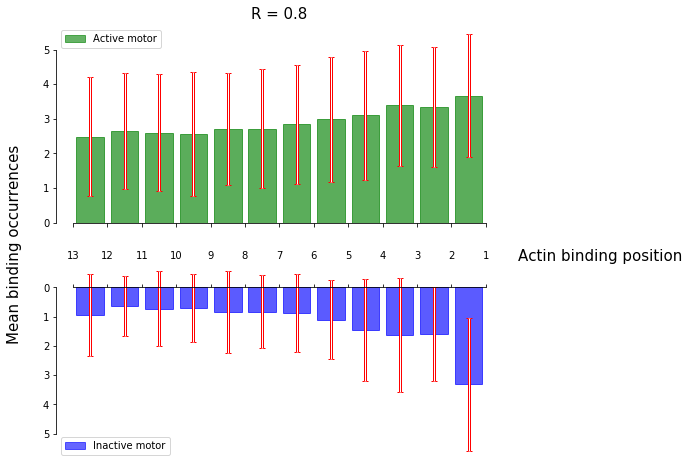

In [49]:
#fig =plt.figure(figsize=(8,8))
#ax = fig.add_subplot(211)
#ax2 = fig.add_subplot(212)
fig, a = plt.subplots(2,1)
#plt.subplots_adjust(hspace=0.15)

bins = np.arange(1.5,13.5)

fig.set_size_inches(8,8)
a[0].bar(bins,abm_mn, yerr=abm_std, align='center', ecolor='red', error_kw=dict(lw=3,capsize=3,capthick=1),\
         facecolor='green', alpha=0.1, ec='green')
a[0].bar(bins,abm_mn, yerr=abm_std, align='center', ecolor='white', error_kw=dict(lw=1,capsize=1,capthick=.5),\
         facecolor='green', alpha=0.6, ec='green', label='Active motor')
a[0].set_xticks(np.arange(1,14,1))
a[0].set_yticks(np.arange(0,6,1))
a[0].spines['top'].set_visible(False)
a[0].spines['right'].set_visible(False)
a[0].spines['bottom'].set_bounds(1,13)
a[0].spines['left'].set_bounds(0,5)
a[0].invert_xaxis()
a[0].tick_params(axis='x', which='both', pad=25)
a[0].legend(loc = 'upper left')
a[0].set_title('R = 0.8', fontsize=15)
#fig.set_size_inches(8,2)
#=========================================================================================
a[1].bar(bins,ibm_mn, yerr=ibm_std, align='center', ecolor='red', error_kw=dict(lw=3,capsize=3,capthick=1),\
         facecolor='blue', alpha=0.1, ec='blue')
a[1].bar(bins,ibm_mn, yerr=ibm_std, align='center', ecolor='white', error_kw=dict(lw=1,capsize=1,capthick=.5),\
         facecolor='blue', alpha=0.6, ec='blue', label='Inactive motor')
a[1].set_xticks(np.arange(1,14,1))
a[1].set_yticks(np.arange(0,6,1))
a[1].spines['bottom'].set_position('zero')
a[1].spines['bottom'].set_bounds(1,13)
a[1].spines['left'].set_bounds(0,5)
a[1].invert_yaxis()
a[1].invert_xaxis()
a[1].tick_params(axis='x', direction='in')#, length=6, width=2, colors='r',grid_color='r', grid_alpha=0.5)
a[1].set_xticklabels([])
a[1].spines['top'].set_visible(False)
a[1].spines['right'].set_visible(False)
a[1].legend(loc = 'lower left')

fig.text(1.07, 0.47, 'Actin binding position', ha='center', fontsize=15)
fig.text(0.04, 0.5, 'Mean binding occurrences', va='center', rotation='vertical', fontsize=15)

#plt.savefig('fig/motors_MNpos5s133R08.svg', fmt='.svg', dpi=1200, bbox_inches='tight')
#plt.savefig('fig/motors_MNpos5s133R08.png', fmt='.png', dpi=1200, bbox_inches='tight')

plt.show()

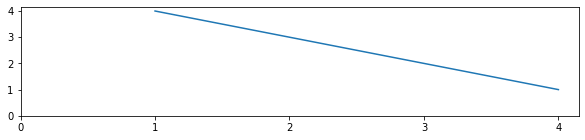

In [21]:
plt.figure(figsize=(10,2))

plt.plot([1,2,3,4],[4,3,2,1])
plt.yticks(np.arange(0,4.1,1))
plt.xticks(np.arange(0,4.1,1))
plt.show()

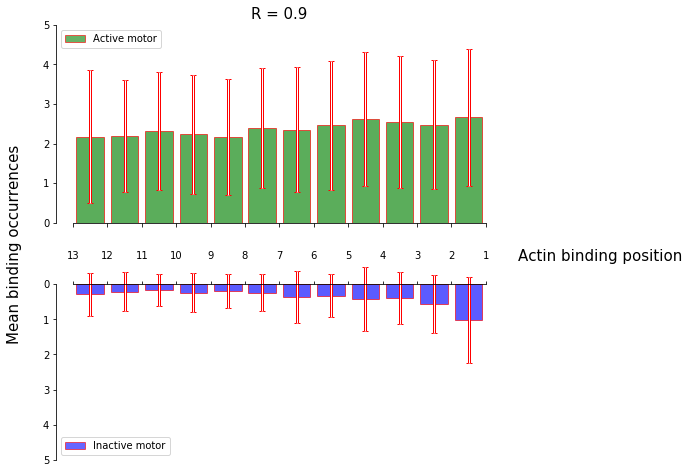

In [46]:
fig =plt.figure(figsize=(8,8))
ax = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
#plt.subplots_adjust(hspace=0.15)

bins = np.arange(1.5,13.5)

ax.bar(bins,abm_mn09, yerr=abm_std09, align='center', ecolor='red', error_kw=dict(lw=3,capsize=3,capthick=1),\
       facecolor='green', alpha=0.1, ec='red')
ax.bar(bins,abm_mn09, yerr=abm_std09, align='center', ecolor='white', error_kw=dict(lw=1,capsize=1,capthick=0.5),\
       facecolor='green', alpha=0.6, ec='red', label='Active motor')
ax.set_xticks(np.arange(1,14,1))
ax.set_yticks(np.arange(0,6,1))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_bounds(1,13)
ax.spines['left'].set_bounds(0,5)
ax.invert_xaxis()
ax.tick_params(axis='x', which='both', pad=25)
ax.legend(loc = 'upper left')
#========================================================================
ax.set_title('R = 0.9', fontsize=15)
ax2.bar(bins,ibm_mn09, yerr=ibm_std09, align='center', ecolor='red', error_kw=dict(lw=3,capsize=3,capthick=1),\
        facecolor='blue', alpha=0.1, ec='red')
ax2.bar(bins,ibm_mn09, yerr=ibm_std09, align='center', ecolor='white', error_kw=dict(lw=1,capsize=1,capthick=.5),\
        facecolor='blue', alpha=0.6, ec='red', label='Inactive motor')
ax2.set_xticks(np.arange(1,14,1))
ax2.set_yticks(np.arange(0,6,1))
ax2.spines['bottom'].set_position('zero')
ax2.spines['bottom'].set_bounds(1,13)
ax2.spines['left'].set_bounds(0,5)
ax2.invert_yaxis()
ax2.invert_xaxis()
ax2.tick_params(axis='x', direction='in')#, length=6, width=2, colors='r',grid_color='r', grid_alpha=0.5)
ax2.set_xticklabels([])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.legend(loc = 'lower left')

fig.text(1.07, 0.47, 'Actin binding position', ha='center', fontsize=15)
fig.text(0.04, 0.5, 'Mean binding occurrences', va='center', rotation='vertical', fontsize=15)

#plt.savefig('fig/motors_MNpos5s133R09.svg', fmt='.svg', dpi=1200, bbox_inches='tight')
#plt.savefig('fig/motors_MNpos5s133R09.png', fmt='.png', dpi=1200, bbox_inches='tight')

plt.show()

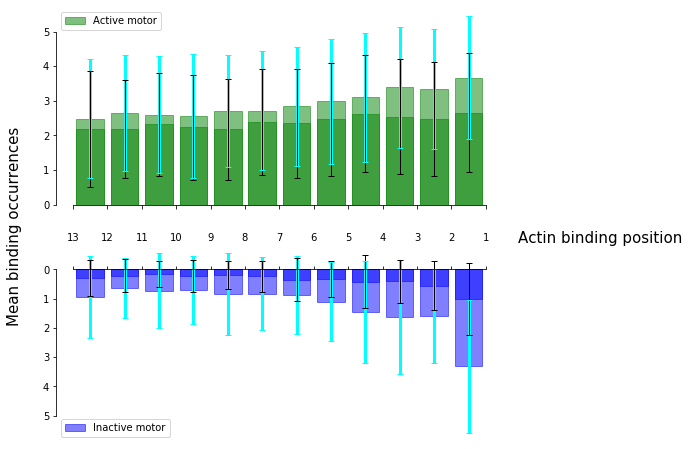

In [55]:
fig =plt.figure(figsize=(8,8))
ax = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
#plt.subplots_adjust(hspace=0.15)

bins = np.arange(1.5,13.5)

ax.bar(bins,abm_mn, yerr=abm_std, align='center', ecolor='cyan', error_kw=dict(lw=3,capsize=3,capthick=1), facecolor='green', alpha=0.5, ec='green', label='Active motor')
ax.set_xticks(np.arange(1,14,1))
ax.set_yticks(np.arange(0,6,1))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_bounds(1,13)
ax.spines['left'].set_bounds(0,5)
ax.invert_xaxis()
ax.tick_params(axis='x', which='both', pad=25)
ax.legend()
#ax.set_title('R = 0.8', fontsize=15)
ax2.bar(bins,ibm_mn, yerr=ibm_std, align='center', ecolor='cyan', error_kw=dict(lw=3,capsize=3,capthick=1),facecolor='blue', alpha=0.5, ec='blue', label='Inactive motor')
ax2.set_xticks(np.arange(1,14,1))
ax2.set_yticks(np.arange(0,6,1))
ax2.spines['bottom'].set_position('zero')
ax2.spines['bottom'].set_bounds(1,13)
ax2.spines['left'].set_bounds(0,5)
ax2.invert_yaxis()
ax2.invert_xaxis()
ax2.tick_params(axis='x', direction='in')#, length=6, width=2, colors='r',grid_color='r', grid_alpha=0.5)
ax2.set_xticklabels([])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.legend()

fig.text(1.07, 0.47, 'Actin binding position', ha='center', fontsize=15)
fig.text(0.04, 0.5, 'Mean binding occurrences', va='center', rotation='vertical', fontsize=15)

#=============================================================================

ax.bar(bins,abm_mn09, yerr=abm_std09, align='center', ecolor='black', error_kw=dict(lw=1,capsize=3,capthick=1), facecolor='green', alpha=0.5, ec='green', label='Active motor')
ax.set_xticks(np.arange(1,14,1))
ax.set_yticks(np.arange(0,6,1))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_bounds(1,13)
ax.spines['left'].set_bounds(0,5)
#ax.invert_xaxis()
ax.tick_params(axis='x', which='both', pad=25)
#ax.legend()
#ax.set_title('R = 0.9', fontsize=15)
ax2.bar(bins,ibm_mn09, yerr=ibm_std09, align='center', ecolor='black', error_kw=dict(lw=1,capsize=3,capthick=1),facecolor='blue', alpha=0.5, ec='blue', label='Inactive motor')
ax2.set_xticks(np.arange(1,14,1))
ax2.set_yticks(np.arange(0,6,1))
ax2.spines['bottom'].set_position('zero')
ax2.spines['bottom'].set_bounds(1,13)
ax2.spines['left'].set_bounds(0,5)
#ax2.invert_yaxis()
#ax2.invert_xaxis()
ax2.tick_params(axis='x', direction='in')#, length=6, width=2, colors='r',grid_color='r', grid_alpha=0.5)
ax2.set_xticklabels([])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
#ax2.legend()

#fig.text(1.07, 0.47, 'Actin binding position', ha='center', fontsize=15)
#fig.text(0.04, 0.5, 'Mean binding occurrences', va='center', rotation='vertical', fontsize=15)

#plt.savefig('fig/motors_MNpos5s133R09.svg', fmt='.svg', dpi=1200, bbox_inches='tight')
#plt.savefig('fig/motors_MNpos5s133R09.png', fmt='.png', dpi=1200, bbox_inches='tight')

plt.show()

In [20]:
import matplotlib.gridspec as gridspec

Text(0.04, 0.5, 'Mean binding occurrences')

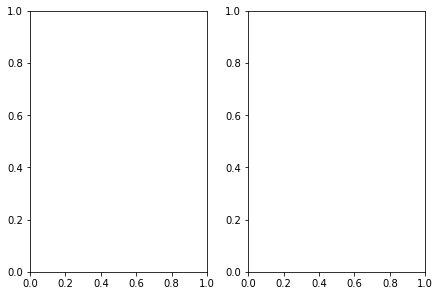

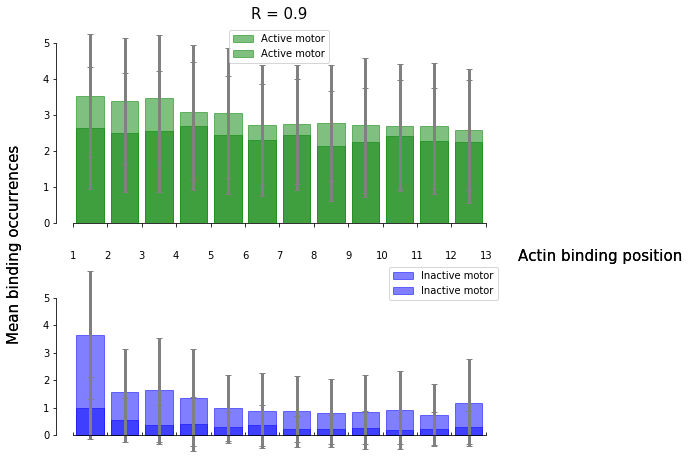

In [24]:
fig2 = plt.figure(constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=2, nrows=1, figure=fig2)

fig =plt.figure(figsize=(8,8))
ax = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
#plt.subplots_adjust(hspace=0.15)

bins = np.arange(1.5,13.5)

f2_ax1 = fig2.add_subplot(spec2[0,0])

ax.bar(bins,abm_mn, yerr=abm_std, align='center', ecolor='gray', error_kw=dict(lw=3,capsize=3,capthick=1), facecolor='green', alpha=0.5, ec='green', label='Active motor')
ax.set_xticks(np.arange(1,14,1))
ax.set_yticks(np.arange(0,6,1))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_bounds(1,13)
ax.spines['left'].set_bounds(0,5)
ax.invert_xaxis()
ax.tick_params(axis='x', which='both', pad=25)
ax.legend()
ax.set_title('R = 0.8', fontsize=15)
ax2.bar(bins,ibm_mn, yerr=ibm_std, align='center', ecolor='gray', error_kw=dict(lw=3,capsize=3,capthick=1),facecolor='blue', alpha=0.5, ec='blue', label='Inactive motor')
ax2.set_xticks(np.arange(1,14,1))
ax2.set_yticks(np.arange(0,6,1))
ax2.spines['bottom'].set_position('zero')
ax2.spines['bottom'].set_bounds(1,13)
ax2.spines['left'].set_bounds(0,5)
ax2.invert_yaxis()
ax2.invert_xaxis()
ax2.tick_params(axis='x', direction='in')#, length=6, width=2, colors='r',grid_color='r', grid_alpha=0.5)
ax2.set_xticklabels([])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.legend()

fig.text(1.07, 0.47, 'Actin binding position', ha='center', fontsize=15)
fig.text(0.04, 0.5, 'Mean binding occurrences', va='center', rotation='vertical', fontsize=15)

f2_ax2 = fig2.add_subplot(spec2[0,1])

ax.bar(bins,abm_mn09, yerr=abm_std09, align='center', ecolor='gray', error_kw=dict(lw=3,capsize=3,capthick=1), facecolor='green', alpha=0.5, ec='green', label='Active motor')
ax.set_xticks(np.arange(1,14,1))
ax.set_yticks(np.arange(0,6,1))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_bounds(1,13)
ax.spines['left'].set_bounds(0,5)
ax.invert_xaxis()
ax.tick_params(axis='x', which='both', pad=25)
ax.legend()
ax.set_title('R = 0.9', fontsize=15)
ax2.bar(bins,ibm_mn09, yerr=ibm_std09, align='center', ecolor='gray', error_kw=dict(lw=3,capsize=3,capthick=1),facecolor='blue', alpha=0.5, ec='blue', label='Inactive motor')
ax2.set_xticks(np.arange(1,14,1))
ax2.set_yticks(np.arange(0,6,1))
ax2.spines['bottom'].set_position('zero')
ax2.spines['bottom'].set_bounds(1,13)
ax2.spines['left'].set_bounds(0,5)
ax2.invert_yaxis()
ax2.invert_xaxis()
ax2.tick_params(axis='x', direction='in')#, length=6, width=2, colors='r',grid_color='r', grid_alpha=0.5)
ax2.set_xticklabels([])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.legend()

fig.text(1.07, 0.47, 'Actin binding position', ha='center', fontsize=15)
fig.text(0.04, 0.5, 'Mean binding occurrences', va='center', rotation='vertical', fontsize=15)